# 1.线性回归


## 1.1线性回归的基本元素
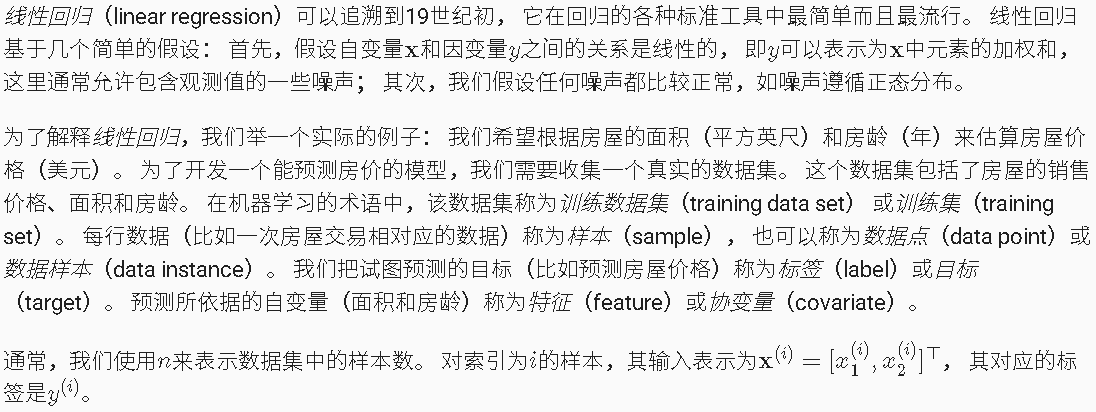

### 1.1.1线性模型
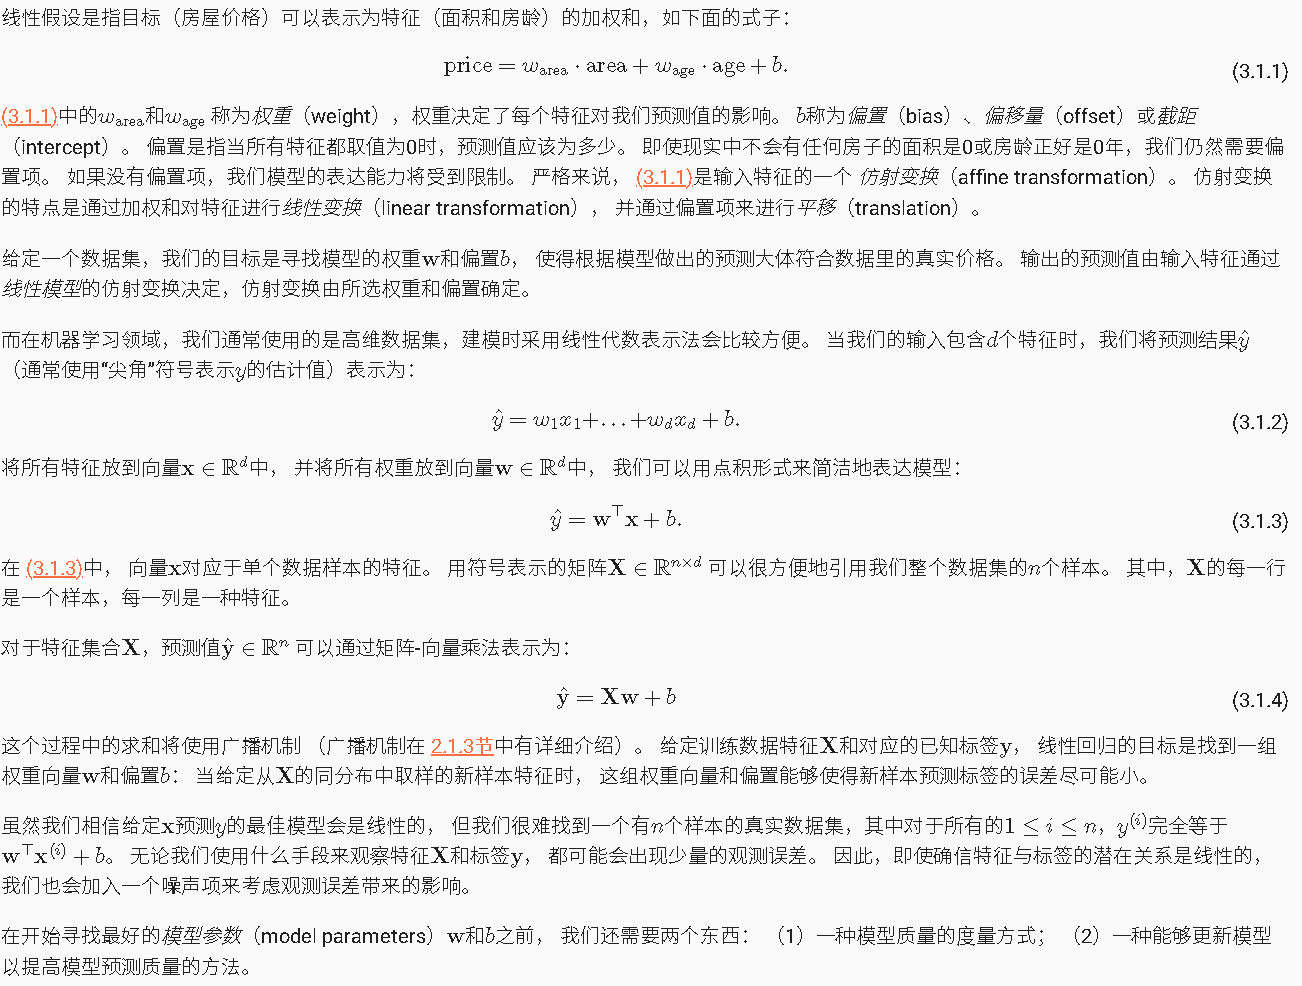

### 1.1.2损失函数
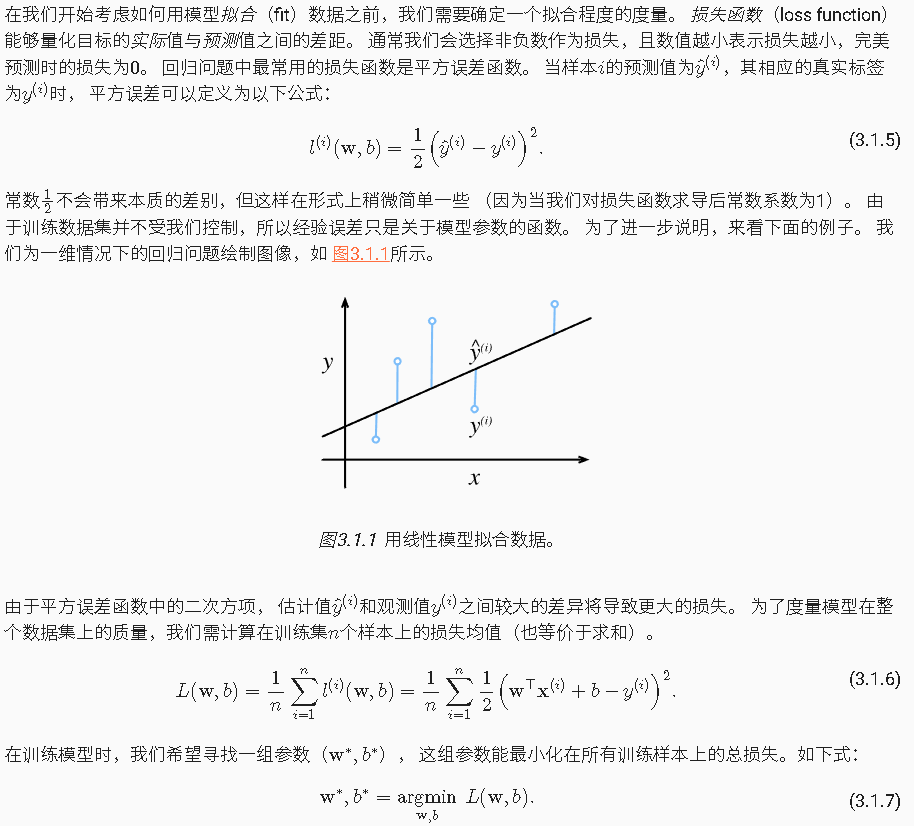

### 1.1.3 解析解
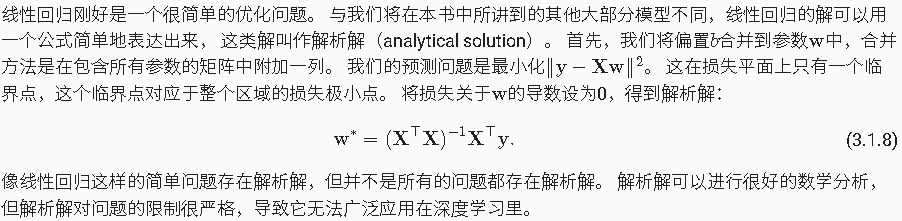

   #### 注释:矩阵的逆
    1. 基本定义
        矩阵A的逆矩阵记为A⁻¹
        满足: A × A⁻¹ = A⁻¹ × A = I（I是单位矩阵）

    2. 重要性质
        不是所有矩阵都有逆（可逆矩阵也叫非奇异矩阵）
        如果存在，逆矩阵是唯一的
        (A⁻¹)⁻¹ = A
        (AB)⁻¹ = B⁻¹A⁻¹
        (A^T)⁻¹ = (A⁻¹)^T


        可逆条件
        矩阵可逆当且仅当：


        行列式不为0
        满秩（rank等于维数）
        列/行线性无关
        零不是特征值

    2. 求法
        - 增广矩阵求法
        ```
        原矩阵A = [2  1]
              [1  3]

        增广矩阵[A|I] = [2  1 | 1  0]
                        [1  3 | 0  1]

        步骤：
        1) R₂ = R₂ - 1/2R₁
        [2  1 | 1  0]
        [0  5/2 | -1/2  1]

        2) R₂ = R₂ × 2/5
        [2  1 | 1  0]
        [0  1 | -1/5  2/5]

        3) R₁ = R₁ - R₂
        [2  0 | 6/5  -2/5]
        [0  1 | -1/5  2/5]

        4) R₁ = R₁ × 1/2
        [1  0 | 3/5  -1/5]
        [0  1 | -1/5  2/5]

        因此 A⁻¹ = [3/5  -1/5]
                   [-1/5  2/5]
        ```
        - 伴随矩阵求法
        ```
        A⁻¹ = (1/|A|) × adj(A)

        其中:
        |A| 是矩阵的行列式
        adj(A) 是A的伴随矩阵

        对于2×2矩阵 A = [a  b]
                    [c  d]

        A⁻¹ = 1/(ad-bc) × [ d  -b]
                     [-c   a]
        ```

### 1.1.4 随机梯度下降
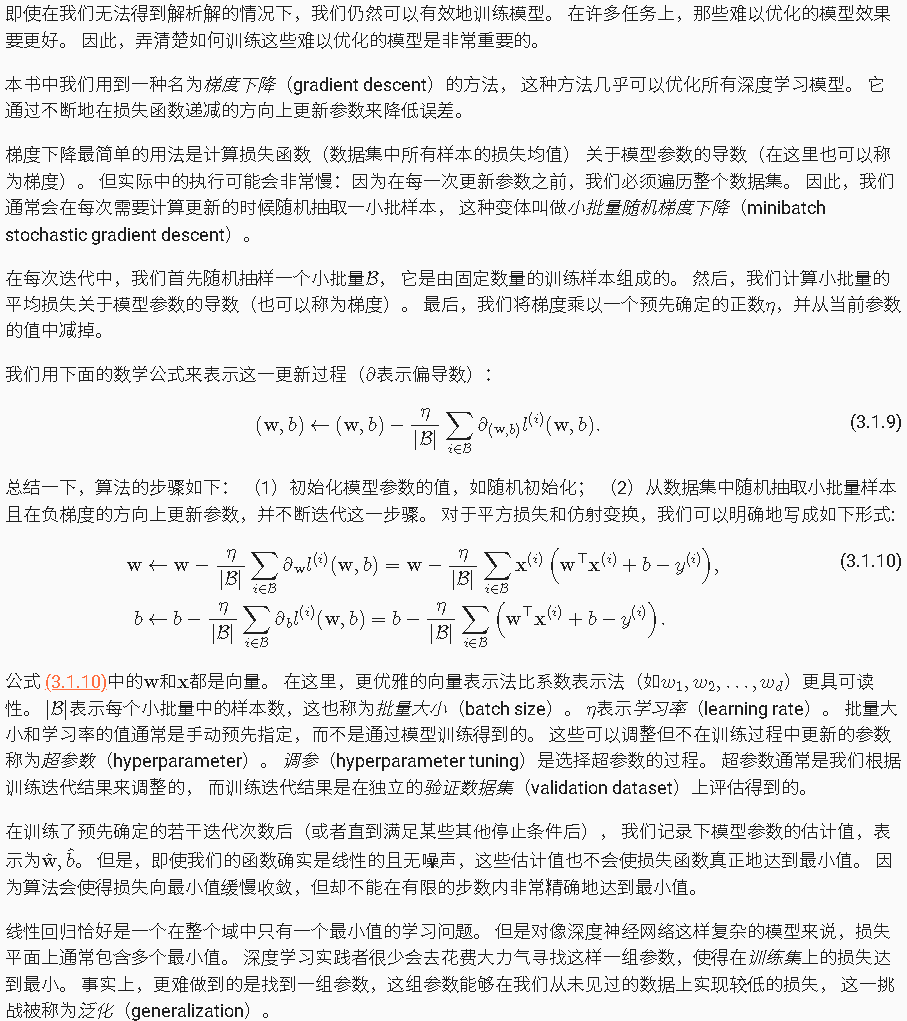

### 1.1.5 用模型进行预测
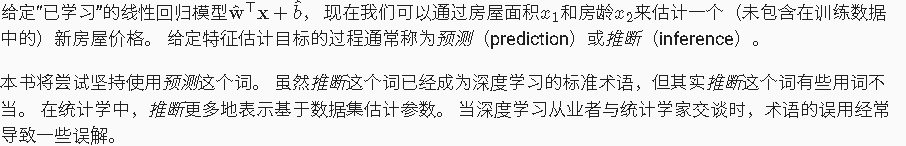

## 1.2 矢量化加速
在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。 为了实现这一点，需要我们对计算进行矢量化， 从而利用线性代数库，而不是在Python中编写开销高昂的for循环。

In [10]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

为了说明矢量化为什么如此重要，我们考虑对向量相加的两种方法。 我们实例化两个全为1的10000维向量。 在一种方法中，我们将使用Python的for循环遍历向量； 在另一种方法中，我们将依赖对+的调用。

In [11]:
n=10000000
a=torch.ones([n])
b=torch.ones([n])

In [12]:
#定义运行时间基准测试
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [13]:
c=torch.zeros(n)
timer=Timer()
for i in range(n):
    c[i]=a[i]+b[i]
print(f'使用for循环计算时间{timer.stop():.5f}sec')

使用for循环计算时间55.21624sec


In [14]:
timer.start()
d=a+b
print(f'使用向量计算时间{timer.stop():.5f}sec')

使用向量计算时间0.00500sec


In [20]:
#使用gpu加速
import torch
# print(torch.__version__)
# print(torch.cuda.is_available())
timer=Timer()
new_a=torch.ones([n], device='cuda')
new_b=torch.ones([n], device='cuda')
d = a.add_(b)  # 使用add_而不是add
print(f'使用gpu向量计算时间{timer.stop():.5f}sec')


使用gpu向量计算时间0.00300sec


### 1.3 正态分布与平方损失
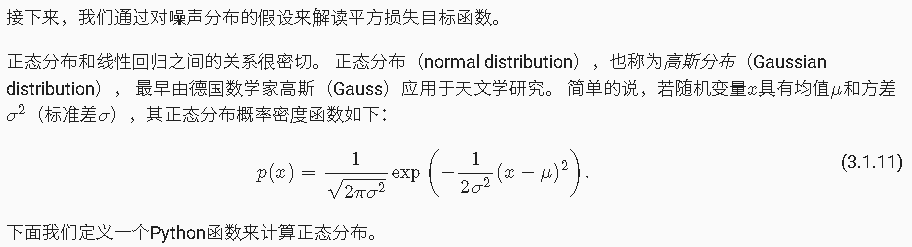

In [21]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

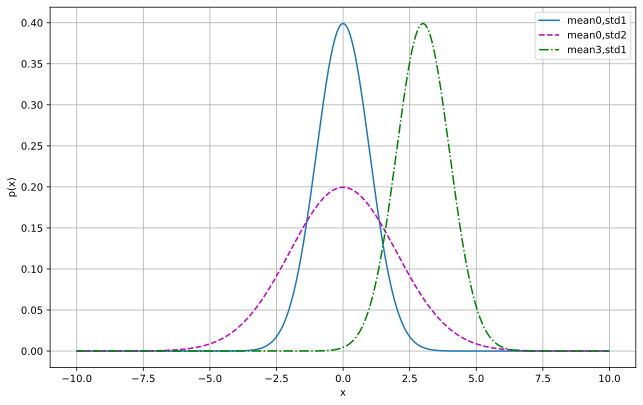

In [28]:
#正态分布可视化
x=np.arange(-10,10,0.01)
# 均值和标准差
params=[(0,1),(0,2),(3,1)]
d2l.plot(x,[normal(x,mu,sigma)for mu,sigma in params],xlabel='x',ylabel='p(x)',figsize=(10.5,6.5),legend=[f'mean{mu},std{sigma}'for mu,sigma in params])

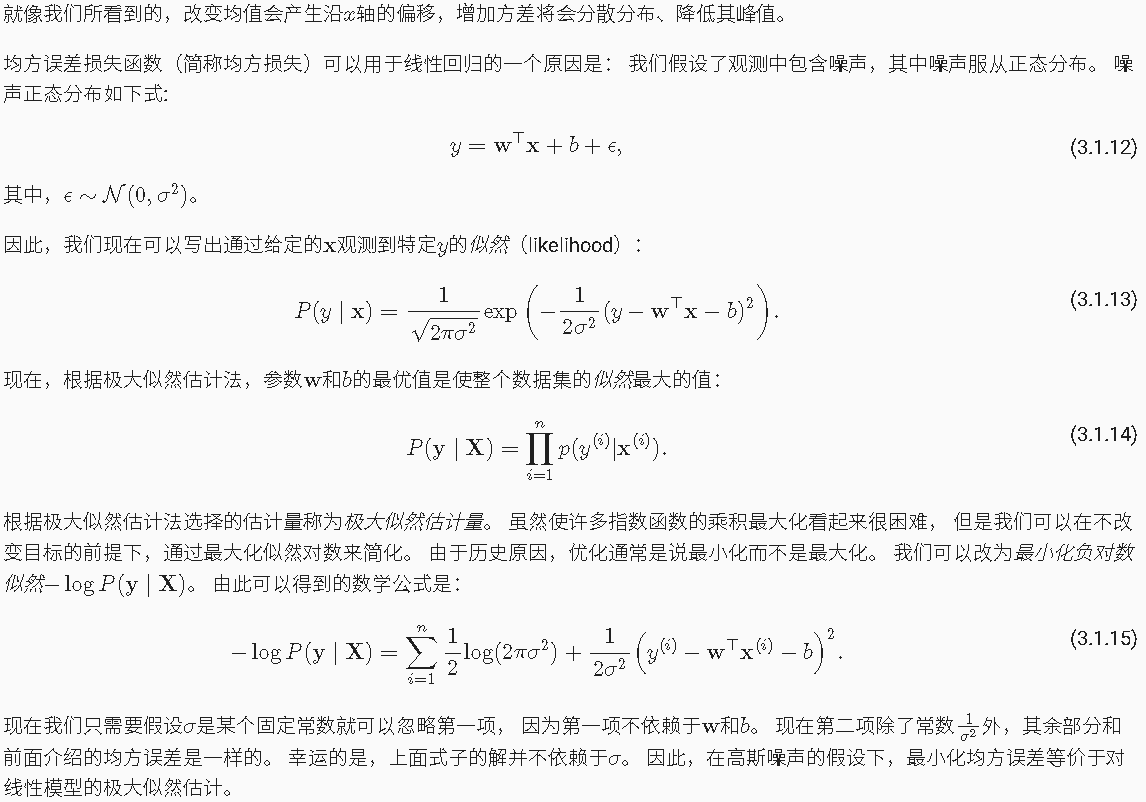

## 1.4 从线性回归到深度网络
到目前为止，我们只谈论了线性模型。 尽管神经网络涵盖了更多更为丰富的模型，我们依然可以用描述神经网络的方式来描述线性模型， 从而把线性模型看作一个神经网络。 首先，我们用“层”符号来重写这个模型。

### 1.4.1 神经网络图


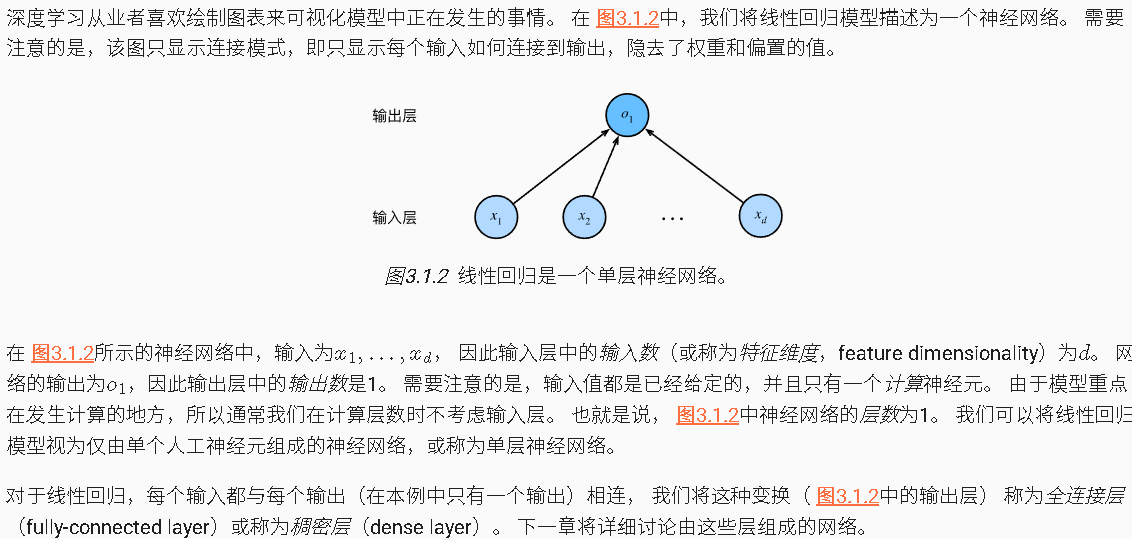

### 1.4.2 生物学
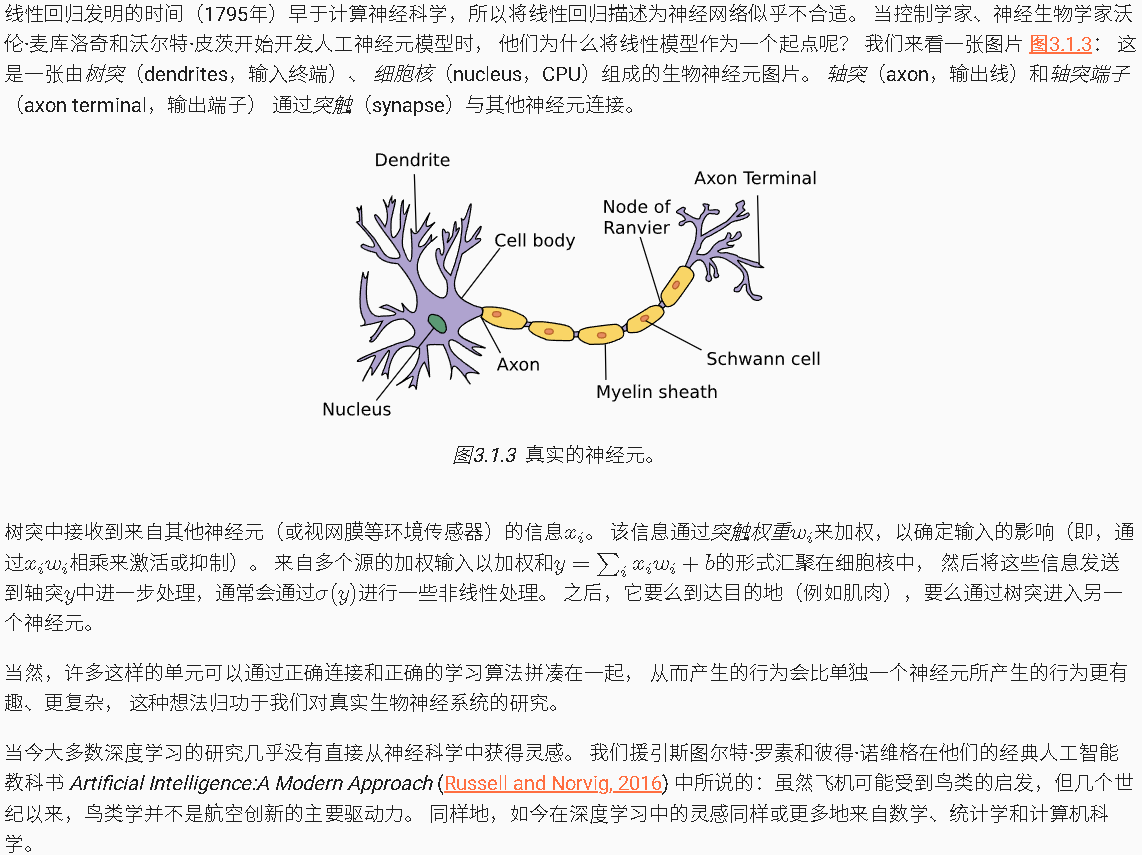

## 1.5小结
机器学习模型中的关键要素是训练数据、损失函数、优化算法，还有模型本身。

矢量化使数学表达上更简洁，同时运行的更快。

最小化目标函数和执行极大似然估计等价。

线性回归模型也是一个简单的神经网络。

## 1.6
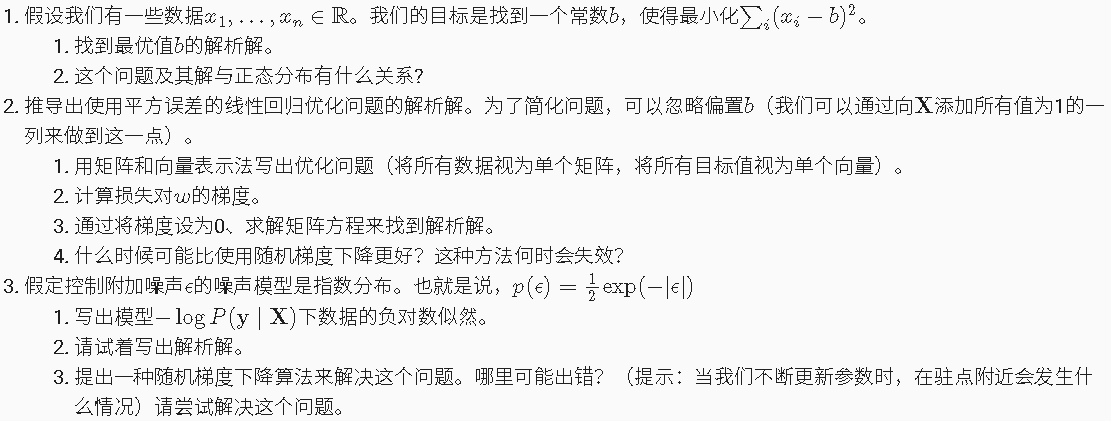

#### 1.
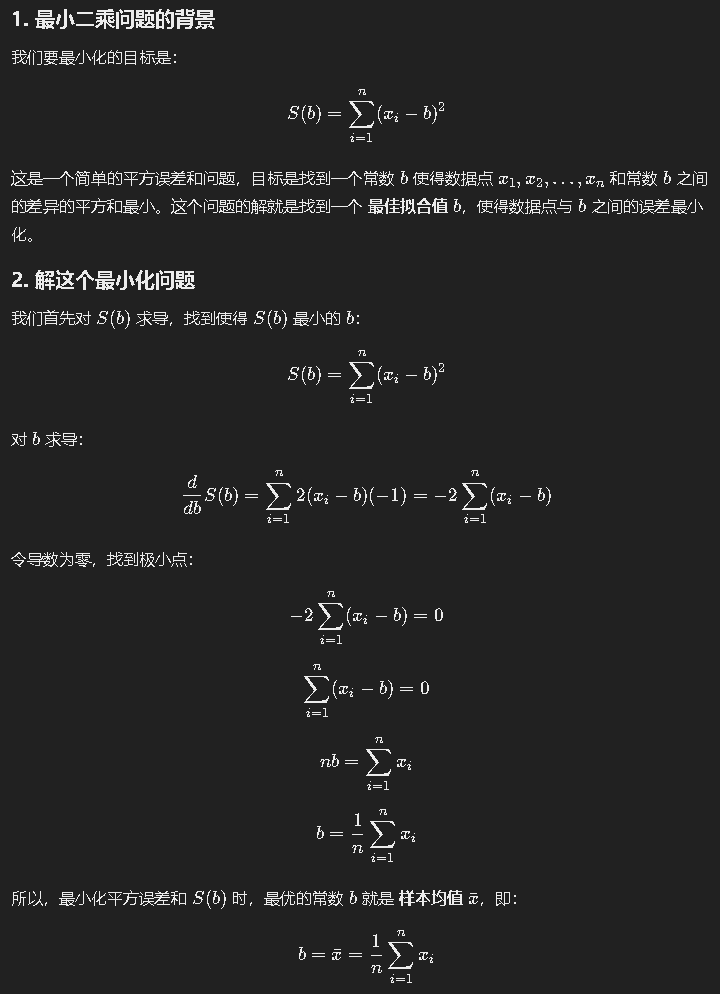
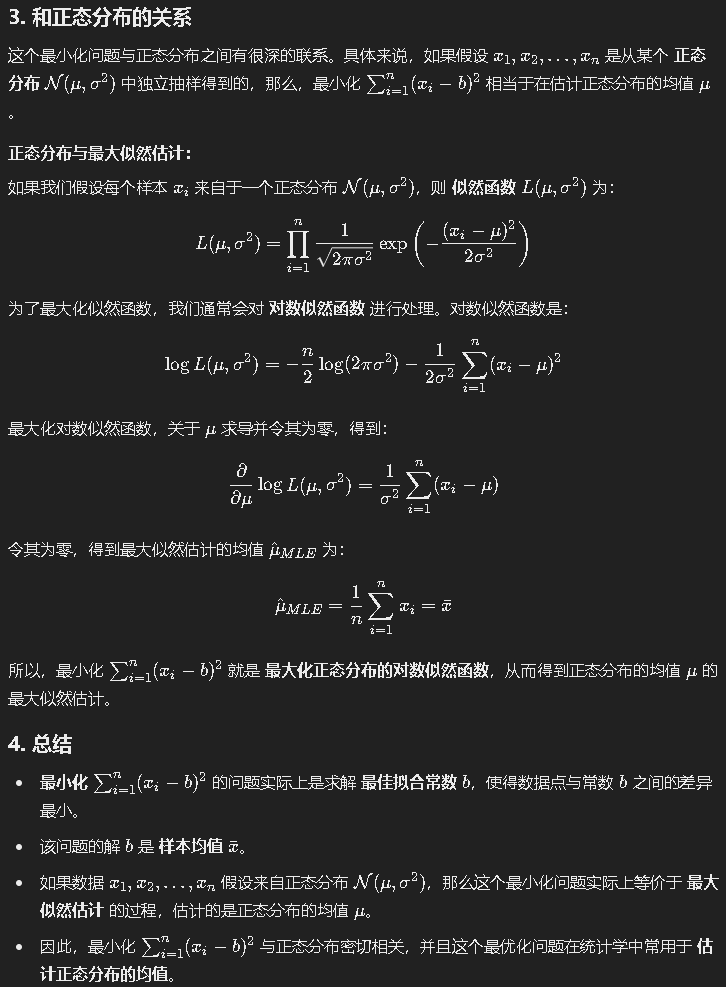

### 2.
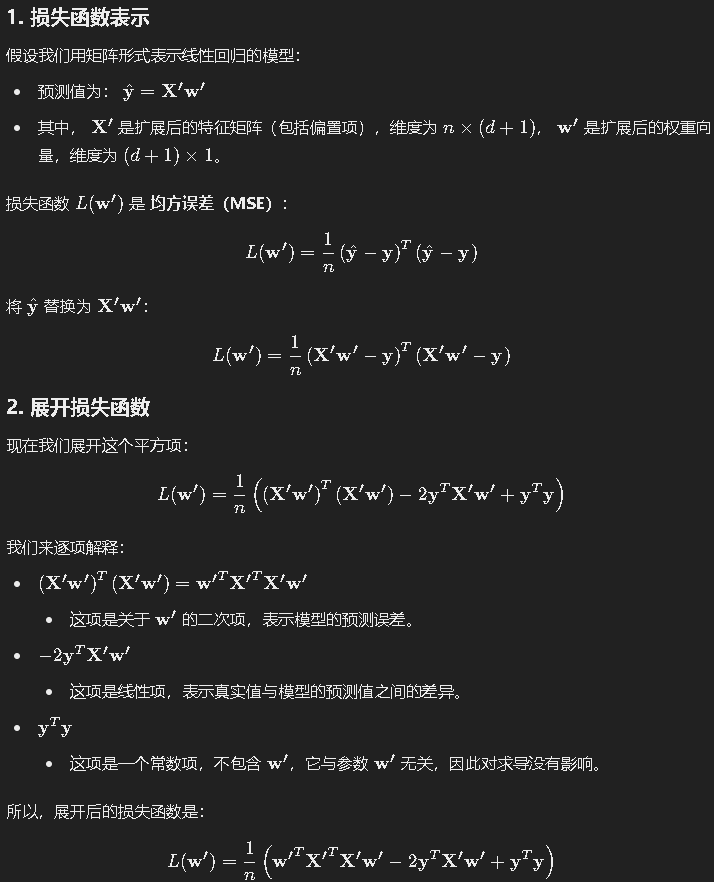
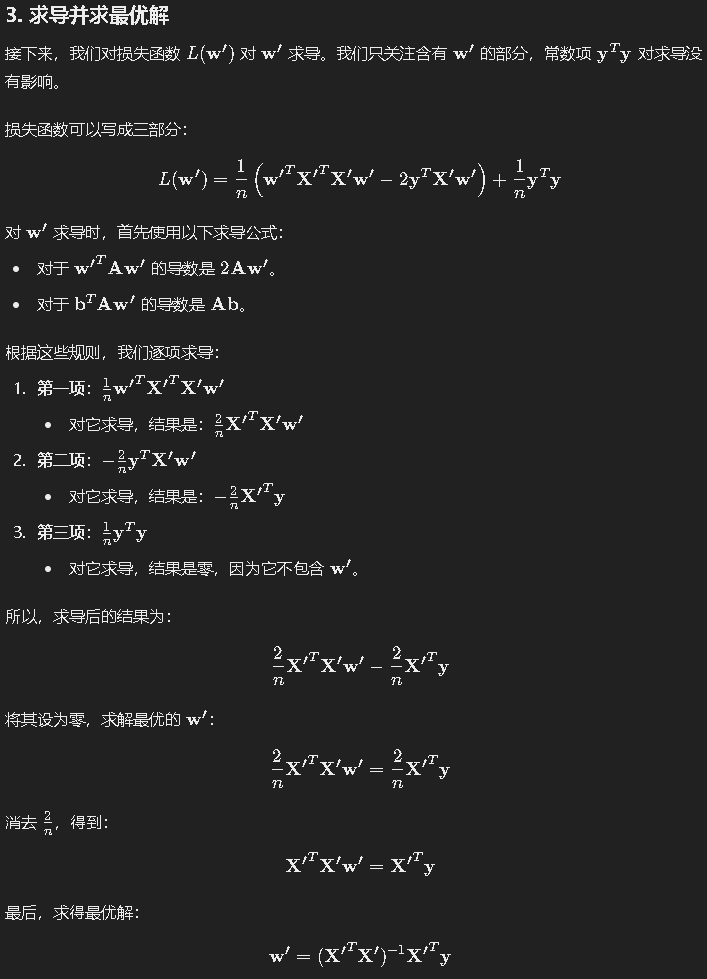

- 解析解可能比使用随机梯度下降（SGD）更好的情况包括：
    1） 简单问题：解析解通常适用于简单的问题，其中目标函数和约束条件很容易求导并求解。在这种情况下，直接计算解析解比使用SGD更高效。
    2） 小规模数据集：对于小规模的数据集，计算解析解可以很快完成，并且由于数据量较小，解析解的计算开销相对较小。
    3） 显式公式要求：某些应用场景可能要求得到显式的公式解析解，例如需要解释、推导或证明的问题。

    然而，解析解的方法在以下情况下可能会失效：
    
1） 复杂问题：对于复杂的问题，目标函数和约束条件可能很难求导或求解，或者求解过程可能非常复杂甚至不存在解析解。在这种情况下，使用SGD等数值优化算法可能更适合。
2) 大规模数据集：对于大规模数据集，计算解析解的计算复杂度可能非常高，甚至无法完成。在这种情况下，SGD通常更具可行性和可扩展性。
3） 随机性和噪声：如果目标函数存在随机性或噪声，并且我们希望在优化过程中考虑到这些因素，那么SGD等迭代方法通常更合适，因为它们可以根据采样的随机梯度进行逐步的调整。

### 3.A.
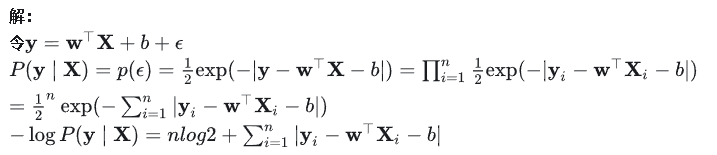



### 3.B.
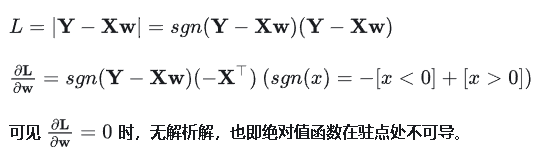


### 3.C
解：
一种随机梯度下降（SGD）算法来解决绝对值函数在驻点不可导的问题是使用次梯度方法。次梯度是绝对值函数的导数的一个推广，它在驻点（即零点）处可以多个解。以下是一种可能的次梯度下降算法：
1） 初始化参数 b 和学习率 α。
2） 选择一个样本 x_i。
3) 计算绝对值函数 f 的次梯度 g：
当 xi > b 时，g = 1；
当 xi < b 时，g = -1；
当 xi = b 时，g ∈ [-1, 1]，可以随机选择一个值。
4) 更新参数 b ：
b = b - α * g。
5) 重复步骤 2-4 直至达到停止条件（例如达到最大迭代次数或梯度变化很小）。

然而，需要注意的是，使用次梯度方法来解决绝对值函数在驻点不可导的问题有一些局限性和可能出错的地方：
1) 更新在驻点附近可能出现震荡：在驻点附近，绝对值函数的次梯度是不唯一的，可能存在多个解。这可能导致参数在驻点附近发生震荡，无法稳定地收敛。
2) 收敛速度慢：由于次梯度方法无法利用函数在驻点附近的二阶信息，相对于使用精确的导数，收敛速度可能较慢。
为了解决这个问题，我们可以考虑采用其他的数值优化算法，如近似二阶梯度的方法，或者采用线搜索等策略来控制步长。这些算法可以更好地处理在驻点附近的不可导性，并提供更快的收敛速度。